In [2]:
import cv2
import os

input_dir = 'rawdata'  # 데이터 폴더
output_dir = 'processed_data'  # 전처리된 데이터 저장 폴더
img_size = (224, 224)  # 이미지 크기

# 폴더 구조 유지하며 전처리
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    output_category_path = os.path.join(output_dir, category)
    os.makedirs(output_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, img_size)  # 크기 조정
            cv2.imwrite(os.path.join(output_category_path, img_name), resized_img)


In [7]:
import cv2
import os

input_dir = 'rawdata/abnormal'  # 'abnormal' 폴더 경로
output_dir = 'processed_data/abnormal'  # 전처리된 데이터를 저장할 폴더
img_size = (224, 224)  # 이미지 크기

# 모든 하위 폴더 탐색 및 처리
for root, subdirs, files in os.walk(input_dir):
    for file_name in files:
        # 이미지 파일 확장자 확인
        if not file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Skipping non-image file: {file_name}")
            continue

        # 입력 파일 경로
        img_path = os.path.join(root, file_name)

        # 출력 파일 경로 (폴더 구조 유지)
        relative_path = os.path.relpath(root, input_dir)  # 'abnormal' 폴더로부터 상대 경로
        output_category_path = os.path.join(output_dir, relative_path)
        os.makedirs(output_category_path, exist_ok=True)  # 출력 폴더 생성

        # 이미지 읽기 및 전처리
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue
        resized_img = cv2.resize(img, img_size)  # 크기 조정

        # 전처리된 이미지 저장
        output_file_path = os.path.join(output_category_path, file_name)
        cv2.imwrite(output_file_path, resized_img)
        print(f"Processed and saved: {output_file_path}")


Processed and saved: processed_data/abnormal/toowide/20241127_205106_002_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_003_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_006_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_007_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_008_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_009_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_013_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_015_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_016_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_021_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_023_saved.jpg
Processed and saved: processed_data/abnormal/toowide/20241127_205106_025_saved.jpg
Proc

In [8]:
base_path = 'processed_data/abnormal'
for folder, subfolders, files in os.walk(base_path):
    print(f"{folder}: {len(files)} files")


processed_data/abnormal: 0 files
processed_data/abnormal/toowide: 151 files
processed_data/abnormal/tooshort: 163 files
processed_data/abnormal/thumbless: 100 files
processed_data/abnormal/stretchleg: 140 files
processed_data/abnormal/kneeup: 119 files
processed_data/abnormal/emergency: 269 files
processed_data/abnormal/footup: 132 files
processed_data/abnormal/usingstomach: 100 files


In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# 입력 데이터 폴더 (전처리된 데이터)
input_dir = 'processed_data'
output_dir = 'dataset'  # 데이터셋 저장 폴더

# 비율 설정
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# 정상/비정상 데이터를 통합 저장할 리스트
normal_images = []
abnormal_images = []

# Normal 클래스 처리
normal_path = os.path.join(input_dir, 'normal')
if os.path.exists(normal_path):
    normal_images = [os.path.join(normal_path, f) for f in os.listdir(normal_path) if os.path.isfile(os.path.join(normal_path, f))]

# Abnormal 클래스 처리 (하위 폴더 포함)
abnormal_path = os.path.join(input_dir, 'abnormal')
for root, subdirs, files in os.walk(abnormal_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        if os.path.isfile(file_path):  # 파일만 추가
            abnormal_images.append(file_path)

# Train/Validation/Test 데이터셋 분리
all_images = {
    'normal': normal_images,
    'abnormal': abnormal_images
}

for label, images in all_images.items():
    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

    # 데이터 복사
    for split, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        split_dir = os.path.join(output_dir, split, label)
        os.makedirs(split_dir, exist_ok=True)
        for img_path in split_imgs:
            shutil.copy(img_path, os.path.join(split_dir, os.path.basename(img_path)))


In [12]:
base_path = 'dataset'
for folder, subfolders, files in os.walk(base_path):
    print(f"{folder}: {len(files)} files")


dataset: 0 files
dataset/train: 0 files
dataset/train/normal: 853 files
dataset/train/abnormal: 704 files
dataset/val: 0 files
dataset/val/normal: 284 files
dataset/val/abnormal: 235 files
dataset/test: 0 files
dataset/test/normal: 285 files
dataset/test/abnormal: 235 files


In [13]:
import tensorflow as tf

train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'
img_size = (224, 224)
batch_size = 32

# Train 데이터셋 로드
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Validation 데이터셋 로드
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Test 데이터셋 로드
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


2024-11-29 19:39:33.146779: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 19:39:33.148344: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 19:39:33.151511: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 19:39:33.161081: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732876773.177806  456930 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732876773.18

Found 1557 files belonging to 2 classes.
Found 519 files belonging to 2 classes.


W0000 00:00:1732876791.764913  456930 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 520 files belonging to 2 classes.


In [14]:
from tensorflow.keras import layers, models

binary_model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 클래스 (normal, abnormal)
])

binary_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/home/sys03202001/.local/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [15]:
history = binary_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.6474 - loss: 803.0210 - val_accuracy: 0.9538 - val_loss: 0.1080
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9844 - loss: 0.0347 - val_accuracy: 0.9884 - val_loss: 0.0454
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9846 - val_loss: 0.0396
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 1.0000 - loss: 3.5630e-04 - val_accuracy: 0.9865 - val_loss: 0.0418
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 1.0000 - loss: 1.4312e-04 - val_accuracy: 0.9865 - val_loss: 0.0443
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 1.0000 - loss: 3.6508e-05 - val_accuracy: 0.9865 - val_loss: 0.0590
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 1.0000 - loss: 5.5515e-06 - val_accuracy: 0.9884 - val_loss: 0.0603
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 1.0000 - loss: 2.2064e

In [16]:
test_loss, test_accuracy = binary_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9900 - loss: 0.0324
Test Accuracy: 0.99


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

y_true = np.concatenate([y for x, y in test_ds], axis=0).argmax(axis=1)
y_pred = binary_model.predict(test_ds).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_true, y_pred))


2024-11-29 19:42:20.316796: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
Confusion Matrix:
 [[100 135]
 [132 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.43      0.43       235
           1       0.53      0.54      0.53       285

    accuracy                           0.49       520
   macro avg       0.48      0.48      0.48       520
weighted avg       0.49      0.49      0.49       520



In [20]:
# model.evaluate()를 통한 정확도 계산
test_loss, test_accuracy = binary_model.evaluate(test_ds, verbose=0)
print(f"Evaluate Accuracy: {test_accuracy:.2f}")

# model.predict()를 사용해 직접 정확도 계산
y_true = np.concatenate([y for x, y in test_ds], axis=0).argmax(axis=1)
y_pred = binary_model.predict(test_ds).argmax(axis=1)
manual_accuracy = np.sum(y_true == y_pred) / len(y_true)
print(f"Manual Accuracy: {manual_accuracy:.2f}")


Evaluate Accuracy: 0.99
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Manual Accuracy: 0.52


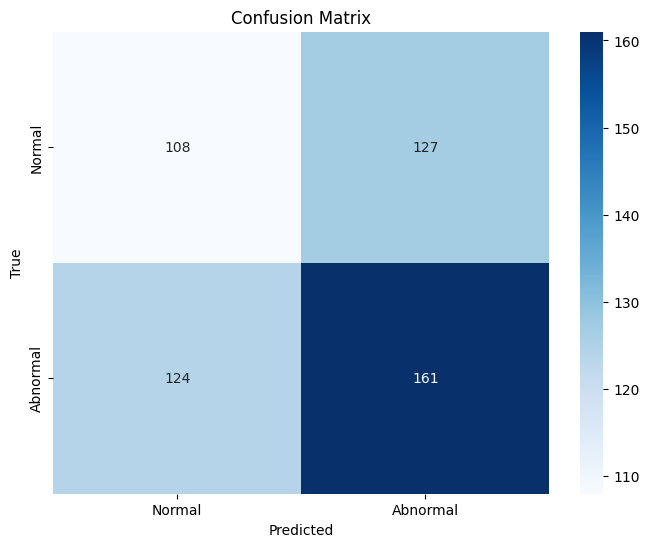

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
for x, y in test_ds.take(1):
    print(f"Batch shape: {x.shape}, Labels: {y.numpy()}")


Batch shape: (32, 224, 224, 3), Labels: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


2024-11-29 19:48:46.144950: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
